In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from google.colab import files 
uploaded= files.upload () 

Saving water_dataset.mat to water_dataset.mat


In [3]:
import scipy.io as sio

In [4]:
mat= sio.loadmat('water_dataset.mat')

In [ ]:
type(mat)

dict

In [5]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X_tr', 'X_te', 'Y_tr', 'Y_te', 'location_group', 'features', 'location_ids'])

# **DATA**

La base de datos a utilizar en este trabajo es proporcionada por el servicio Geológico de los Estados Unidos. Contiene información de la calidad del agua medida en 37 lugares distinto del estado de Georgia y en base al Potencial de Hidrogeno, este atributo será la variable para pronosticar en función de 9 atributos tomados de una muestra de 423 días.

Para los 37 lugares se tomaros medidas diarias del volumen de oxígeno disuelto, la temperatura y la conductancia específica, del total de las mediciones por variable se sacaron diariamente los valores mínimos, promedios y máximos generando así los 9 atributos.

Para la variable de respuesta (PH) de las 37 medidas se tomó como medida diariamente la mediana.

Los datos estaban almacenados en un archivo .MAT,(de Matlab) que al ser extraído en python generaban un archivo de tipo DICT (Diccionario). De este se extrae para consolidar la base de datos la información de las llaves o carpetas asociadas a los datos de los atributos predictivos, los datos de la variable de respuesta y la información de las variable.


# **MÉTODO Y RESULTADO**

Las metodologías utilizadas para el tratamiento de la información obtenida y la emisión de resultados fueron las herramientas de Machine Learning con regresión lineal múltiple y Machine Learning con Random Forest. Como resultado se obtuvo un valor de RMSE de 0,0045 con la metodología de Machine Learning con regresión lineal múltiple y 0,0017 para el método con Random Forest, logrando este último establecer una mejor regresión con un ajuste del 99,08% de los datos contra un 93,60% del modelo con regresión lineal. Para mejor apreciación del ajuste ver la figura Siguiente.

![Imagen 1. Comparación de Métodos de regresión Mediante Machine Learning](https://github.com/Neverurueta/MACHINE-LEARNING.-TAREA-3-/blob/main/Figura%201.png?raw=true)

In [6]:
names=("MaxCE_WSinFiltrar","MaxPH_WSinFiltrar","MinCE_WSinFiltrar","PromCE_WSinFiltrar","MinPH_WSinFiltrar","MaxOD_WSinFiltrar","PromOD_WSinFiltrar","MinOD_WSinFiltrar","PromT_WSinFiltrar","MaxT_WSinFiltrar","MinT_WSinFiltrar") 

In [7]:
mat_xtr = np.transpose(mat['X_tr'][0])
data=pd.DataFrame([x[0] for x in mat_xtr],columns=names)
data["PH"]=np.transpose(mat['Y_tr'][0])

In [8]:
data=data.drop(columns=["MaxPH_WSinFiltrar","MinPH_WSinFiltrar"])

In [9]:
data

,MaxCE_WSinFiltrar,MinCE_WSinFiltrar,PromCE_WSinFiltrar,MaxOD_WSinFiltrar,PromOD_WSinFiltrar,MinOD_WSinFiltrar,PromT_WSinFiltrar,MaxT_WSinFiltrar,MinT_WSinFiltrar,PH
0,0.001131,0.001120,0.001113,0.841463,0.765152,0.787402,0.293750,0.298077,0.276163,0.648148
1,0.001131,0.001120,0.001113,0.841463,0.757576,0.779528,0.293750,0.288462,0.287791,0.648148
2,0.001131,0.001120,0.001133,0.841463,0.765152,0.779528,0.300000,0.294872,0.293605,0.648148
3,0.001131,0.001139,0.001133,0.841463,0.757576,0.779528,0.306250,0.301282,0.296512,0.648148
4,0.001131,0.001139,0.001133,0.841463,0.750000,0.771654,0.325000,0.317308,0.325581,0.648148
...,...,...,...,...,...,...,...,...,...,...
418,0.002008,0.001984,0.001992,0.878049,0.712121,0.724409,0.471875,0.464744,0.462209,0.666667
419,0.002047,0.002004,0.002012,0.878049,0.689394,0.708661,0.512500,0.506410,0.494186,0.666667
420,0.002164,0.002024,0.002031,0.878049,0.674242,0.692913,0.531250,0.532051,0.505814,0.666667
421,0.002125,0.002004,0.002031,0.878049,0.666667,0.685039,0.543750,0.544872,0.517442,0.666667


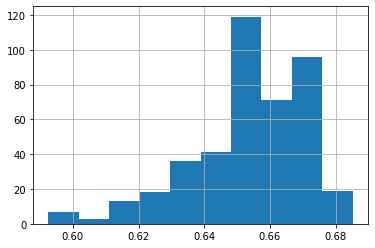

In [10]:
data["PH"].hist()

In [11]:
data.describe().T #Transpuesta

,count,mean,std,min,25%,50%,75%,max
MaxCE_WSinFiltrar,423.0,0.003272,0.018189,0.001072,0.001676,0.001930,0.002222,0.354776
MinCE_WSinFiltrar,423.0,0.001787,0.000290,0.001061,0.001572,0.001807,0.002024,0.002613
PromCE_WSinFiltrar,423.0,0.001943,0.001505,0.001055,0.001641,0.001855,0.002070,0.031250
MaxOD_WSinFiltrar,423.0,0.848411,0.022384,0.768293,0.841463,0.853659,0.865854,0.890244
PromOD_WSinFiltrar,423.0,0.594885,0.094677,0.378788,0.522727,0.590909,0.674242,0.803030
MinOD_WSinFiltrar,423.0,0.591296,0.104949,0.362205,0.503937,0.582677,0.685039,0.826772
PromT_WSinFiltrar,423.0,0.622776,0.198348,0.259375,0.454688,0.581250,0.826562,0.950000
MaxT_WSinFiltrar,423.0,0.627940,0.203111,0.250000,0.456731,0.583333,0.834936,0.964744
MinT_WSinFiltrar,423.0,0.590975,0.184498,0.252907,0.433140,0.552326,0.779070,0.895349
PH,423.0,0.649221,0.017673,0.592593,0.638889,0.648148,0.666667,0.685185


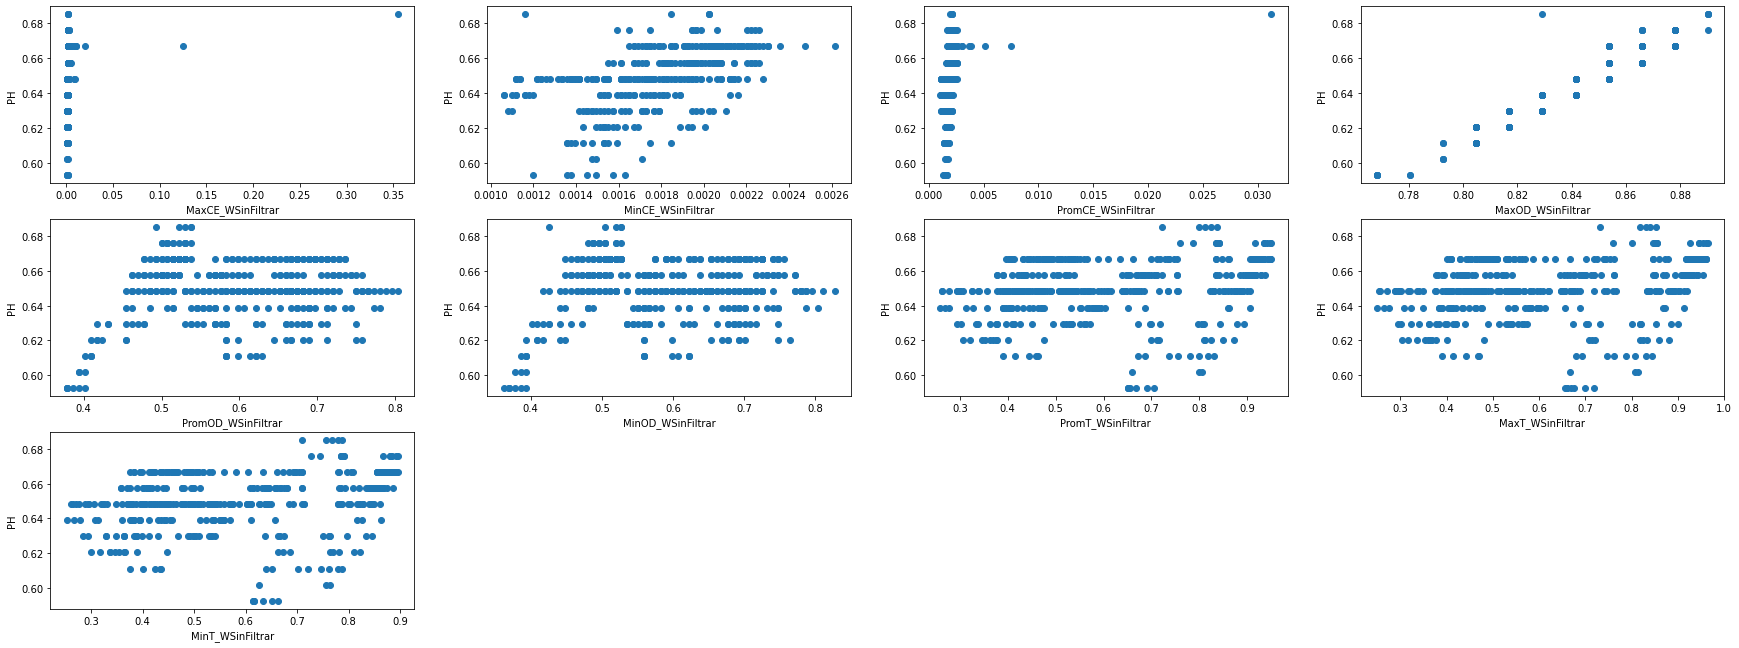

In [12]:
plt.figure(figsize=(30,15))
for i,j in enumerate(data.columns[:-1]):
    plt.subplot(4,4,i+1)
    plt.scatter(data[j],data["PH"])
    plt.xlabel(j)
    plt.ylabel("PH")
plt.show()

In [13]:
#MACHINE LEARNNG
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [14]:
features=data.drop(columns=["PH"])
target=data["PH"]
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.00001, random_state = 42) #test_size EL PORCENTAJE PARA PRUEBA  random_state SEMILLA PARA GENERAR LOS NÚMEROS ALEATORIOS

In [15]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
prediction_LR =  LR.predict(x_test)
prediction_LR

array([0.64571157])

Feature: 0, Score: 0.03374
Feature: 1, Score: -1.58895
Feature: 2, Score: 1.32247
Feature: 3, Score: 0.69461
Feature: 4, Score: 0.06651
Feature: 5, Score: -0.03655
Feature: 6, Score: 0.16223
Feature: 7, Score: -0.04079
Feature: 8, Score: -0.10689


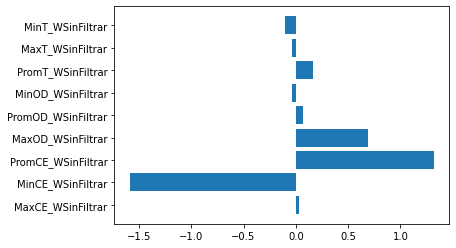

In [16]:
# get importance
var=LR.feature_names_in_
importance = LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(var, importance)
plt.show()

In [42]:
LR.intercept_

0.029858142930027642

In [18]:
LR.coef_

array([ 0.03374347, -1.58894614,  1.32247395,  0.69460967,  0.06651332,
       -0.03655185,  0.16222615, -0.0407932 , -0.10688892])

In [19]:
LR.feature_names_in_

array(['MaxCE_WSinFiltrar', 'MinCE_WSinFiltrar', 'PromCE_WSinFiltrar',
       'MaxOD_WSinFiltrar', 'PromOD_WSinFiltrar', 'MinOD_WSinFiltrar',
       'PromT_WSinFiltrar', 'MaxT_WSinFiltrar', 'MinT_WSinFiltrar'],
      dtype=object)

In [22]:
predictions_LR=LR.predict(features)

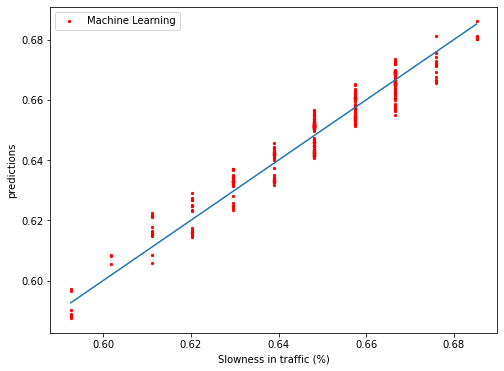

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(data["PH"],predictions_LR, label="Machine Learning",s=5,c="r")
u=np.linspace(data["PH"].min(),data["PH"].max(),5)
plt.plot(u,u)
plt.xlabel("Slowness in traffic (%)")
plt.ylabel("predictions")
plt.legend()
plt.show()

In [24]:
LR2 = LinearRegression(fit_intercept=False)
# fitting the training data
LR2.fit(x_train,y_train)
predictions_LR2=LR2.predict(features)

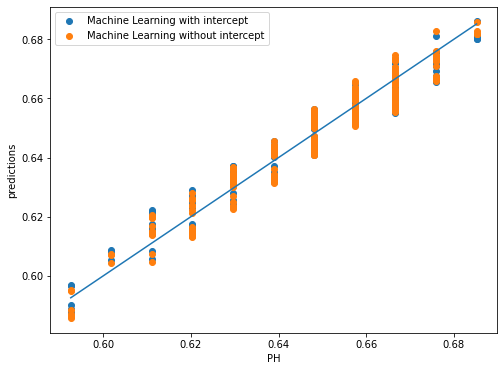

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(data["PH"],predictions_LR, label="Machine Learning with intercept")
plt.scatter(data["PH"],predictions_LR2, label="Machine Learning without intercept")
u=np.linspace(data["PH"].min(),data["PH"].max(),5)
plt.plot(u,u)
plt.xlabel("PH")
plt.ylabel("predictions")
plt.legend()
plt.show()

In [27]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score_LR=r2_score(target,predictions_LR)
score_LR2=r2_score(target,predictions_LR2)
RMS2_LR=np.sqrt(mean_squared_error(target,predictions_LR))
RMS2_LR2=np.sqrt(mean_squared_error(target,predictions_LR2))

for i,j in zip([score_LR,score_LR2],["score_LR","score_LR2"]):
    print(j," is ",i)
for i,j in zip([RMS2_LR,RMS2_LR2],["RMS2_LR","RMS2_LR2"]):
    print(j," is ",i)  #LR es regresión Lineal, LR2 es la misma regresión lineal sin el intercepto

score_LR  is  0.9360398465913051
score_LR2  is  0.9346790478059404
RMS2_LR  is  0.004464198481934979
RMS2_LR2  is  0.004511438075060483


In [28]:
#Random Forest
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state=5678) #N_estimators 100 arboles distintos 
 
# fit the regressor with x and y data
regressor.fit(features, target) 
predictions_RF=regressor.predict(features)

In [29]:
score_RF=r2_score(target,predictions_RF)
RMS2_RF=np.sqrt(mean_squared_error(target,predictions_RF))

In [30]:
for i,j in zip([score_LR,score_LR2,score_RF],["score_LR","score_LR2","score_RF"]):
    print(j," is ",i)
for i,j in zip([RMS2_LR,RMS2_LR2,RMS2_RF],["RMS2_LR","RMS2_LR2","RMS2_RF"]):
    print(j," is ",i)

score_LR  is  0.9360398465913051
score_LR2  is  0.9346790478059404
score_RF  is  0.9908265914487115
RMS2_LR  is  0.004464198481934979
RMS2_LR2  is  0.004511438075060483
RMS2_RF  is  0.0016906515812263507


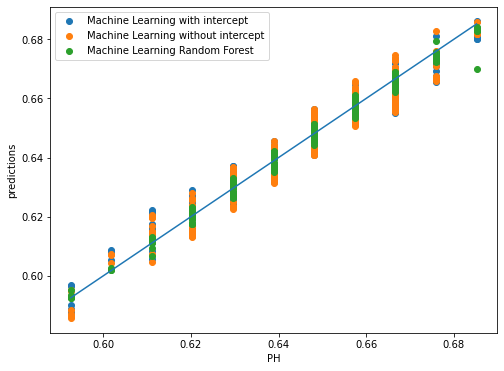

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(data["PH"],predictions_LR, label="Machine Learning with intercept")
plt.scatter(data["PH"],predictions_LR2, label="Machine Learning without intercept")
plt.scatter(data["PH"],predictions_RF, label="Machine Learning Random Forest")
u=np.linspace(data["PH"].min(),data["PH"].max(),5)
plt.plot(u,u)
plt.xlabel("PH")
plt.ylabel("predictions")
plt.legend()
plt.show()

Feature: MaxCE_WSinFiltrar, Score: 0.02721
Feature: MinCE_WSinFiltrar, Score: 0.00648
Feature: PromCE_WSinFiltrar, Score: 0.01930
Feature: MaxOD_WSinFiltrar, Score: 0.88266
Feature: PromOD_WSinFiltrar, Score: 0.01946
Feature: MinOD_WSinFiltrar, Score: 0.01022
Feature: PromT_WSinFiltrar, Score: 0.00875
Feature: MaxT_WSinFiltrar, Score: 0.01255
Feature: MinT_WSinFiltrar, Score: 0.01338


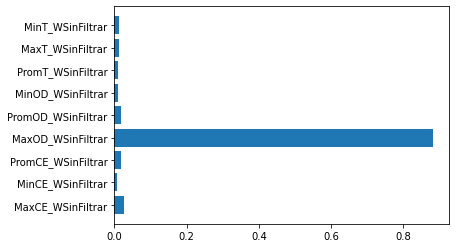

In [33]:
# get importance
var_RF=regressor.feature_names_in_
importance_RF = regressor.feature_importances_
# summarize feature importance
for i,v in zip(var_RF,importance_RF):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(var_RF, importance_RF)
plt.show()